# **AdaBoost** 🧬
AdaBoost (Adaptive Boosting) is a powerful ensemble learning algorithm that combines multiple "weak" machine learning models (like shallow decision trees, or stumps) sequentially to create one "strong", highly accurate classifier or regressor. It works by iteratively training models, giving more weight to data points that previous models misclassified, making subsequent models focus on correcting those errors, thus adapting to the data's weaknesses. It's known for its effectiveness in classification but can be sensitive to noisy data and outliers.

![ada](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

## The working
- ### Creating stumps
A stump is a *week learner*, a single model that takes the data and get trained on it. Even in making a week learner (stump), our focus should be on making the best stump with least error. The error made by one stump is handled by the next one.

- ### Calculating weights and total error
Every data point of the training data set is assigned a by-default weight $ w_{i} $. When the stump makes any wronf prediction, the weights of the wronf records are added to calculate $ total\ error $. In regression extra steps are done to calculate this.

$$ w_{i} = 1/N,\ [N = number\ of\ records] $$
$$ ... $$
$$ in\ classification: $$
$$ total\ error = \sum_{i=1}^{k} w_{i} $$
$$ k = number\ of\ wrong\ predictions $$
$$ w_{i} = weights\ of\ wrong\ predictions $$
$$ ... $$
$$ in\ regression: $$
$$ e_{i} = |y - ŷ|,\ [absolute\ error] $$
$$ L_{i} = \frac {e_{i}}{max(e_{i})} $$
$$ total\ error = \sum_{i=1}^{k} w_{i}*L_{i} $$
$$ k = number\ of\ wrong\ predictions $$
$$ w_{i} = weights\ of\ wrong\ predictions $$
$$ L_{i} = Normalised\ error\ of\ wrong\ predictions $$

- ### Calculating performance of stump
λ is calculated for the stump which indicated it's performance.
$$ λ = \frac {1}{2} * log_{e}(\frac {1-total\ error}{total\ error}) $$

- ### Updating weights
Our aim is to reduce the weights of correctly predicted points and increase the weight of wrongly classified one.\
The weights are updated with way:
$$ w_{i} = w_{i} * e^{-p},\ for\ correctly\ classified\ weights. $$
$$ w_{i} = w_{i} * e^{p},\ for\ incorrectly\ classified\ weights. $$
$$ p = performance\ of\ the\ stump. $$

After this updation, we will *normalise* the weights so that the summation becomes **1**.
$$ w_{i} = \frac {w_{i}}{S_{w}} $$
$$ S_{w} = Summation\ of\ weights. $$

- ### Creating bins
Bins are just ranges that are made by cumulative addition of normalised weights of data points upto the current one.
$$ Bin_{i} = (C_{i-1}, C_{i}] $$
$$ C_{i} = \sum_{i=1}^{n} w_{i} $$
$$ n = number\ of\ records\ till\ i^{th}\ record $$

- ### Data points given to next stump
The next stump genrates a number $ r $ for each data point. $ r $ is a random number generated in range (0, 1).\
For each data point, we check $ r $ falls in which *bin*, and then we take the corresponding data point.

Now, as the data points with incorrect prediction have wider *bin range*, so the probability of them being choosen rises! That's how the next stumps gets trained on the previous model's mistakes.

These all steps are repeated for the next stump too.

## The predictions
How the predictions for new data is predicted? The AdaBoost algorithm makes an equation after training all the stumps, the equation:

$$ λ₁(M₁) + λ₂(M₂) + ... + λ_{n}(M_{n}) $$
$$ M = prediction\ by\ the\ stump\ or\ Model $$
$$ λ = the\ corresonding\ performance\ score $$

For classification:
We simply the equation and see which class has **highest co-efficient**, that class is selected as final output.

For regression:
In regression we use different approach to find the final preciction. We find the **weighted median** of all predictions.\
- We calculate weights of each prediction by normalising the performance scores (λ) so that they add up to 1.
- We sort the predicted values
- We calculated the cumulative weights for each, first value to have cumulative weight $ ≥ 0.5 $ is considered as final output.

## Implementation

In [37]:
# Get the data set

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [38]:
import pandas as pd

X, y = pd.DataFrame(data['data'], columns=data['feature_names']), data['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
# split into train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# train the model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)      
# by default adaboost uses decision trees, so here we are using 100 decision trees.
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [41]:
# make predictions
y_pred = ada.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [42]:
# check for the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

0.9790209790209791
[[53  1]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Let's try one stump (Decision tree)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.25, 0.25, 'gini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.191\nsamples = 159\nvalue = [142, 17]'),
 Text(0.625, 0.5, '  False')]

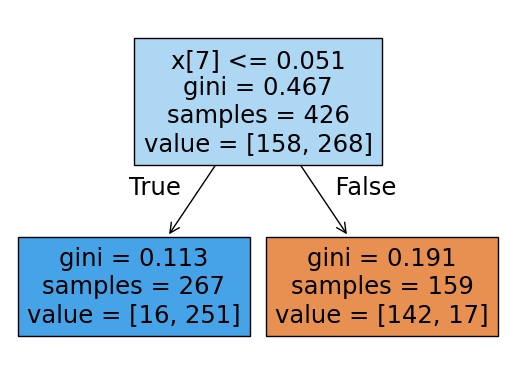

In [44]:
from sklearn import tree
tree.plot_tree(dt, filled=True)

### A stump has usually only one split that's why we pruned the tree to `max_depth = 1`

In [45]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [46]:
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

0.8951048951048951
[[50  4]
 [11 78]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        54
           1       0.95      0.88      0.91        89

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.89       143
weighted avg       0.90      0.90      0.90       143



### One decision tree had 89% of accuracy where as 100s of them gave 97.9% score.